In [3]:
import spacy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize

from matplotlib import colors
%matplotlib inline

In [7]:
css_colors = list(colors.CSS4_COLORS.keys())
css_colors = pd.Series(css_colors)
css_hsv = (css_colors
    .apply(colors.to_rgb)
    .apply(colors.rgb_to_hsv)
    .apply(pd.Series)
)
css_hsv['name'] = css_colors
css_hsv = css_hsv[css_hsv[1] > 0.3]
css_hsv = css_hsv.reset_index()

# map_color = { i:color for i, color in enumerate(css_colors)}
map_color = css_hsv.name
map_color

0            aqua
1      aquamarine
2            blue
3      blueviolet
4           brown
         ...     
88         tomato
89      turquoise
90         violet
91         yellow
92    yellowgreen
Name: name, Length: 93, dtype: object

In [8]:
features, labels = make_blobs(n_features=2, centers=3, n_samples=1000)

df = pd.DataFrame(zip(*features.T, labels), columns=['x', 'y', 'label'])

## send points to the positive cuadrant
df['y'] = df.y - df.y.min()
df['x'] = df.x - df.x.min()

df['label'] = df.label.apply(lambda l: map_color[l])
df

,x,y,label
0,3.953176,14.194996,aqua
1,1.929288,7.532986,aquamarine
2,4.846209,6.318595,aquamarine
3,17.299615,3.470883,blue
4,4.244968,14.874033,aqua
...,...,...,...
995,2.453267,6.051971,aquamarine
996,3.458937,13.166052,aqua
997,16.674274,4.793275,blue
998,4.366095,14.723395,aqua


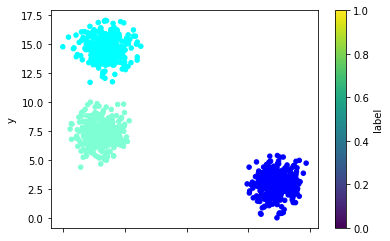

In [9]:
df.plot.scatter(x='x', y='y', c='label')

In [10]:
kmc = KMeans(n_clusters=3)
kmc.fit(df[['x', 'y']])

df['k-means'] = [map_color[l] for l in kmc.labels_]
df

,x,y,label,k-means
0,3.953176,14.194996,aqua,blue
1,1.929288,7.532986,aquamarine,aquamarine
2,4.846209,6.318595,aquamarine,aquamarine
3,17.299615,3.470883,blue,aqua
4,4.244968,14.874033,aqua,blue
...,...,...,...,...
995,2.453267,6.051971,aquamarine,aquamarine
996,3.458937,13.166052,aqua,blue
997,16.674274,4.793275,blue,aqua
998,4.366095,14.723395,aqua,blue


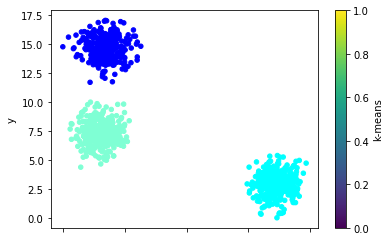

In [11]:
df.plot.scatter(x='x', y='y', c='k-means')

In [12]:
df['isSimilar'] = df['label'] == df['k-means']
df.isSimilar.value_counts() / 10

False    66.7
True     33.3
Name: isSimilar, dtype: float64

## With Cosine Measures

1. Trransforrm to polar
3. crate cluster

In [76]:
def to_polar(vect):
    x, *_ = vect
    h = np.linalg.norm(vect)
    θ = np.arccos(x / h) * 180 / np.pi

    return pd.Series([h, θ])

df[['x', 'y']].apply(to_polar, axis=1)

096250991001153 16.854683513419385
16.907691023599764 16.74911110560161
15.659384699455577 1.6465249844976366
14.97674247583024 3.4331441952539734
17.025147751449765 16.550430769646308
15.98478263321125 15.980150754089417
17.414680784451534 17.182978328135263
16.721150192764554 16.258472862995035
17.121576178489352 16.844524512220637
8.656721784132802 3.1448093140360376
18.90227660941303 18.701113005607333
14.811255772467776 2.4360898388743593
14.693591027838528 0.9038239952325196
9.104362441946755 4.75944349627203
18.971414952565386 18.61692431034437
6.952545661424557 3.033949286736089
7.711152140316667 2.7308945819823425
7.863602255908697 2.5410066511301608
19.418814231639843 18.933625923802822
8.806359287762776 4.521223854692455
16.205932785388732 3.045798418145223
7.8935075882459085 2.079529321777011
6.8083045243703335 0.6965625888390417
8.686016311619467 3.4476512969485613
18.430415968231486 18.29790422173536
14.66712759410316 2.7071621151290177
15.015297080872399 3.89105027462877

,0,1
0,14.735179,74.437970
1,7.776119,75.634645
2,7.963064,52.512672
3,17.644368,11.344831
4,15.467922,74.071543
...,...,...
995,6.530304,67.934011
996,13.612831,75.280098
997,17.349551,16.038106
998,15.357121,73.482732


In [57]:
a = [1, 2]
x, y = a
print(x, y)

1 2


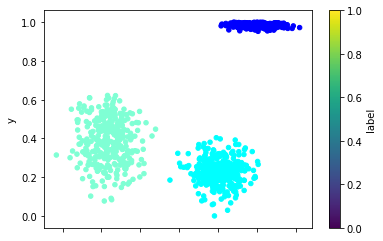

In [29]:
df_polar = pd.DataFrame()
df_polar['label'] = df.label
df_polar['h'] = df[['x', 'y']].apply(to_polar)
# df_polar['y'] = np.arccos(df_polar.y) * 180 / np.pi        ## Angle grades
df_polar['x'] = np.sqrt(df.x ** 2 + df.y ** 2)

df_polar.plot.scatter(x='x', y='y', c='label')

In [30]:
kmc = KMeans(n_clusters=3)
kmc.fit(df_polar[['x', 'y']])

df_polar['k-means'] = [map_color[l] for l in kmc.labels_]
df_polar['k-means'].value_counts()

aqua          340
aquamarine    333
blue          327
Name: k-means, dtype: int64

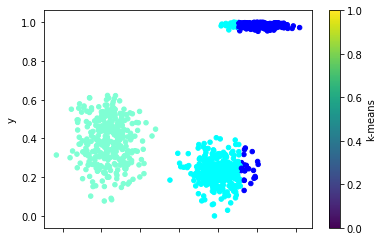

In [31]:
df_polar.plot.scatter(x='x', y='y', c='k-means')